In [ ]:
import numpy as np
#import modin.pandas as pd
import os
import time
import pandas as pd
from tqdm import tqdm
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import pyplot as plt

Error: Session cannot generate requests

In [ ]:
time_resolution = '1week'

data_path = '/mnt/data0/proj_osgeo/data_ASF_trial/network_data'+time_resolution+'/'

c_path = './network_data'+time_resolution+'/commits/'
e_path = './network_data'+time_resolution+'/emails/'
mix_path = './network_data'+time_resolution+'/mix/'
#c_path = './network_data/commits/'

df_tech_overlaps = pd.read_csv("./tech_overlaps_series"+time_resolution+".csv")
df_tech_overlaps = pd.read_csv("./tech_overlaps_series"+time_resolution+".csv")
df_mix_overlaps = pd.read_csv("./mix_overlaps_series"+time_resolution+".csv")

projects = os.listdir(c_path)
project_names = [x.split('__')[0] for x in projects]
project_names_tech = pd.Series(project_names).drop_duplicates().values

projects = os.listdir(e_path)
project_names = [x.split('__')[0] for x in projects]
project_names_tech = pd.Series(project_names).drop_duplicates().values

In [ ]:
len(df_tech_overlaps)

25

In [ ]:
df_tech_overlaps

,Trafodion,OpenWebBeans,Myriad,Drill,Jena,stdcxx,Etch,SINGA,Impala,Wave,...,Olingo,SocialSite,Groovy,Geronimo,OGNL,RCF,Concerted,Alois,SpamAssassin,Kabuki
0,"[0.5714285714285714, 0.42105263157894735, 0.57...","[0.0, 0, 0.0, 1.0, 1.0, 0.8, 0.5, 0.6666666666...","[1.0, 0.2727272727272727, 0.07692307692307693,...","[0.14583333333333334, 0.25, 0.2790697674418604...","[0.5, 0.3888888888888889, 0.13636363636363635,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2857142857142...","[1.0, 0.0, 0, 1.0, 1.0, 0.6666666666666666, 0....","[0, 0, 0, 0, 0, 0.0, 0, 0, 0.0, 0, 0, 0.333333...","[0.0, 0, 0, 0, 0.0, 0.3333333333333333, 0.8, 0...","[0.0, 0.06875, 0.0, 0.3333333333333333, 0.0344...",...,"[0.5, 0.42857142857142855, 0.25, 0.0, 0.5, 0.0...","[0.0, 0.0, 0, 0, 0, 0, 0, 0]","[0.2222222222222222, 0.08, 0.16666666666666666...","[0.25, 0.0, 0.25, 0.4, 0.23809523809523808, 0....","[0.7222222222222222, 0.17073170731707318, 0.24...","[0, 0, 0.0, 0.0, 0]","[0.4375, 0.2727272727272727, 0.666666666666666...","[0, 0.0, 1.0, 0.0, 0.0, 0.5, 0.0, 0, 1.0, 0.14...","[0.25, 0.5, 0.4666666666666667, 0.222222222222...","[0.0, 0.0, 0.0, 1.0, 0.0]"
1,"[0.2857142857142857, 0.42105263157894735, 0.15...","[0, 0, 0.0, 1.0, 0.8888888888888888, 0.5, 0.5,...","[0.5, 0.0, 0.3333333333333333, 0.0, 0.33333333...","[0.027777777777777776, 0.16666666666666666, 0....","[0.0, 0.13636363636363635, 0.2, 0.111111111111...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0,...","[0.0, 0, 0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.5, 0.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0...","[0, 0, 0, 0, 0.0, 0.0, 0.2, 0.0, 0.08695652173...","[0.0, 0.0, 0.0, 0.1111111111111111, 0.0, 0.222...",...,"[0.0, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0, 0, 0, 0, 0, 0]","[0.0, 0.0, 0.1111111111111111, 0.1470588235294...","[0.0, 0.0, 0.08333333333333333, 0.066666666666...","[0.2222222222222222, 0.1836734693877551, 0.083...","[0, 0, 0.0, 0]","[0.2727272727272727, 0.6666666666666666, 0.0, ...","[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 1.0, 1...","[0.2857142857142857, 0.35714285714285715, 0.33...","[0.0, 0.0, 0.0, 0.0]"
2,"[0.2857142857142857, 0.10526315789473684, 0.0,...","[0, 0, 0.0, 1.0, 0.5555555555555556, 0.5, 0.2,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.027777777777777776, 0.05555555555555555, 0....","[0.0, 0.2, 0.1111111111111111, 0.1111111111111...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0,...","[0, 0, 0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666,...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0,...","[0, 0, 0, 0, 0, 0]","[0.0, 0.0, 0.05555555555555555, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0454545454545...","[0.1388888888888889, 0.0625, 0.090909090909090...","[0, 0, 0]","[0.6666666666666666, 0.0, 0.0, 0.0, 0, 0, 0, 0...","[0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0.0, 1.0, 1.0...","[0.21428571428571427, 0.35714285714285715, 0.2...","[0.0, 0.0, 0.0]"
3,"[0.14285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0, 0, 0.0, 0.6666666666666666, 0.5, 0.2, 0.5,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.027777777777777776, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.1111111111111111, 0.1111111111111111, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0...","[0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0...","[0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.08333333333333333, 0.06060606060606061, 0.0...","[0, 0]","[0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0.0, 1.0, 0.0, ...","[0.21428571428571427, 0.21428571428571427, 0.2...","[0.0, 0.0]"
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",

In [ ]:
arr_overlap = df_tech_overlaps.iloc[0].apply(lambda x: eval(x)).values.tolist()
arr_overlap

[[0.5714285714285714,
  0.42105263157894735,
  0.5789473684210527,
  0.225,
  0.2916666666666667,
  0.175,
  0.2602739726027397,
  0.27450980392156865,
  0.2909090909090909,
  0.203125,
  0.04878048780487805,
  0.0,
  0.35714285714285715,
  0.03636363636363636,
  0.0,
  0.06451612903225806,
  0.2631578947368421,
  0.3333333333333333,
  0.0,
  0.17857142857142858,
  0.17647058823529413,
  0.08695652173913043,
  0.037037037037037035,
  0.5,
  0.425,
  0.028169014084507043,
  0.2,
  0.11363636363636363,
  0.2608695652173913,
  0.20689655172413793,
  0.030303030303030304,
  0.3333333333333333,
  0.14285714285714285,
  0.5333333333333333,
  0.1951219512195122,
  0.4666666666666667,
  0.4714285714285714,
  0.11312217194570136,
  0.18055555555555555,
  0.15517241379310345,
  0.1702127659574468,
  0.36666666666666664,
  0.16363636363636364,
  0.4827586206896552,
  0.21296296296296297,
  0.12244897959183673,
  0.26666666666666666,
  0.11627906976744186,
  0.21428571428571427,
  0.29729729729729

In [ ]:
sum(arr_overlap, [])

[0.5714285714285714,
 0.42105263157894735,
 0.5789473684210527,
 0.225,
 0.2916666666666667,
 0.175,
 0.2602739726027397,
 0.27450980392156865,
 0.2909090909090909,
 0.203125,
 0.04878048780487805,
 0.0,
 0.35714285714285715,
 0.03636363636363636,
 0.0,
 0.06451612903225806,
 0.2631578947368421,
 0.3333333333333333,
 0.0,
 0.17857142857142858,
 0.17647058823529413,
 0.08695652173913043,
 0.037037037037037035,
 0.5,
 0.425,
 0.028169014084507043,
 0.2,
 0.11363636363636363,
 0.2608695652173913,
 0.20689655172413793,
 0.030303030303030304,
 0.3333333333333333,
 0.14285714285714285,
 0.5333333333333333,
 0.1951219512195122,
 0.4666666666666667,
 0.4714285714285714,
 0.11312217194570136,
 0.18055555555555555,
 0.15517241379310345,
 0.1702127659574468,
 0.36666666666666664,
 0.16363636363636364,
 0.4827586206896552,
 0.21296296296296297,
 0.12244897959183673,
 0.26666666666666666,
 0.11627906976744186,
 0.21428571428571427,
 0.2972972972972973,
 0.1875,
 0.5,
 0.4430379746835443,
 0.2368421

In [ ]:
df_incubating = pd.read_csv('/mnt/data0/lkyin/incubating.csv')
df_graduated = pd.read_csv('/mnt/data0/lkyin/graduated.csv')
df_retired = pd.read_csv('/mnt/data0/lkyin/retired.csv')

In [ ]:
c_path = '/mnt/data0/lkyin/monthly_data/commits/'
projects = os.listdir(c_path)
print("Total:", len(projects), "months")

proj_names = []
proj_ids= []
proj_status = []
for project in tqdm(projects):
    project_name, period = project.replace('.csv', '').split('__')
    proj_ids.append(project_name)
    if project_name in df_incubating["alias"].values :
        proj_status.append("incubating")
        proj_names.append(str(df_incubating.loc[df_incubating["alias"] == project_name]["project_name"].values[0]))
    elif project_name in df_graduated["alias"].values :
        proj_status.append('graduated')
        proj_names.append(str(df_graduated.loc[df_graduated["alias"] == project_name]["project_name"].values[0]))
    elif project_name in df_retired["alias"].values :
        proj_status.append('retired')
        proj_names.append(str(df_retired.loc[df_retired["alias"] == project_name]["project_name"].values[0]))
    else:
        proj_status.append('unknown')
        proj_names.append('unknown')

Total: 4327 months


100%|██████████| 4327/4327 [00:01<00:00, 3615.46it/s]


In [ ]:
tech_proj_names = pd.Series(proj_names)
print(tech_proj_names.describe())

tech_proj_ids = pd.Series(proj_ids)

tech_proj_status = pd.Series(proj_status)
print(tech_proj_status.unique())

df_proj_tech = pd.DataFrame()
df_proj_tech['project_name'] = tech_proj_names
df_proj_tech['project_aliase'] = tech_proj_ids
df_proj_tech['project_status'] = tech_proj_status

df_proj_tech = df_proj_tech.drop_duplicates()
df_proj_tech.describe()

count        4327
unique        263
top       JSPWiki
freq           63
dtype: object
['retired' 'graduated']


,project_name,project_aliase,project_status
count,263,263,263
unique,263,263,2
top,Taverna,taverna,graduated
freq,1,1,204


In [ ]:
all_graduated = df_proj_tech.where(df_proj_tech['project_status']=='graduated')["project_name"].dropna().unique().tolist()
for col in all_graduated:
    if col not in df_tech_overlaps:
        all_graduated.remove(col)
    elif col not in df_tech_overlaps:
        all_graduated.remove(col)
len(all_graduated)
#print(all_graduated)

204

In [ ]:
all_retired = df_proj_tech.where(df_proj_tech['project_status']=='retired')["project_name"].dropna().unique().tolist()

for col in all_retired:
    if col not in df_tech_overlaps:
        all_retired.remove(col)
    elif col not in df_tech_overlaps:
        all_retired.remove(col)
#len(all_graduated)
#print(all_graduated)
len(all_retired)
#print(all_graduated)

58

In [ ]:
df_tech_overlaps_graduated = df_tech_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(len(df_tech_overlaps))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_tech_overlaps_graduated.loc[time].apply(lambda x: eval(x)).values.tolist()
    #data_thistime = remove_minus(data_thistime)
    data_thistime = sum(data_thistime,[])
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})

df_tech_overlaps_retired = df_tech_overlaps[all_retired]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_overlaps_retired.loc[time].apply(lambda x: eval(x)).values.tolist()
    #data_thistime = remove_minus(data_thistime)
    data_thistime = sum(data_thistime,[])
    datas_t_retired.append(data_thistime)


labels_time = [x+1 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : tech Networks")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


<Figure size 1080x720 with 0 Axes>

In [ ]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')

plt.title("Compare Projects Average Overlap : tech Networks")

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.regplot(x=dd[dd['Type']=='Graduated']['Time'], y=dd[dd['Type']=='Graduated']['value'], lowess=True, color="lightcoral", 
            line_kws={"color":"red", "linewidth": 1})
sns.regplot(x=dd[dd['Type']=='Retired']['Time'], y=dd[dd['Type']=='Retired']['value'], lowess=True, color="lightblue", 
            line_kws={"color":"blue", "linewidth": 1})

Error: Session cannot generate requests

In [ ]:
dd

,Time,Type,value
0,1,Graduated,0
1,1,Graduated,0
2,1,Graduated,0
3,1,Graduated,0
4,1,Graduated,0
...,...,...,...
32539209,5,Retired,0.0
32539210,5,Retired,0.166667
32539211,5,Retired,0.666667
32539212,5,Retired,0.666667


In [ ]:
df_tech_overlaps_graduated = df_tech_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(len(df_tech_overlaps))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_tech_overlaps_graduated.loc[time].apply(lambda x: eval(x)).values.tolist()
    #data_thistime = remove_minus(data_thistime)
    data_thistime = sum(data_thistime,[])
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})

df_tech_overlaps_retired = df_tech_overlaps[all_retired]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_overlaps_retired.loc[time].apply(lambda x: eval(x)).values.tolist()
    #data_thistime = remove_minus(data_thistime)
    data_thistime = sum(data_thistime,[])
    datas_t_retired.append(data_thistime)


labels_time = [x+1 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : tech Networks")

[0, 1, 2, 3, 4]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Projects Average Overlap : Social Networks')

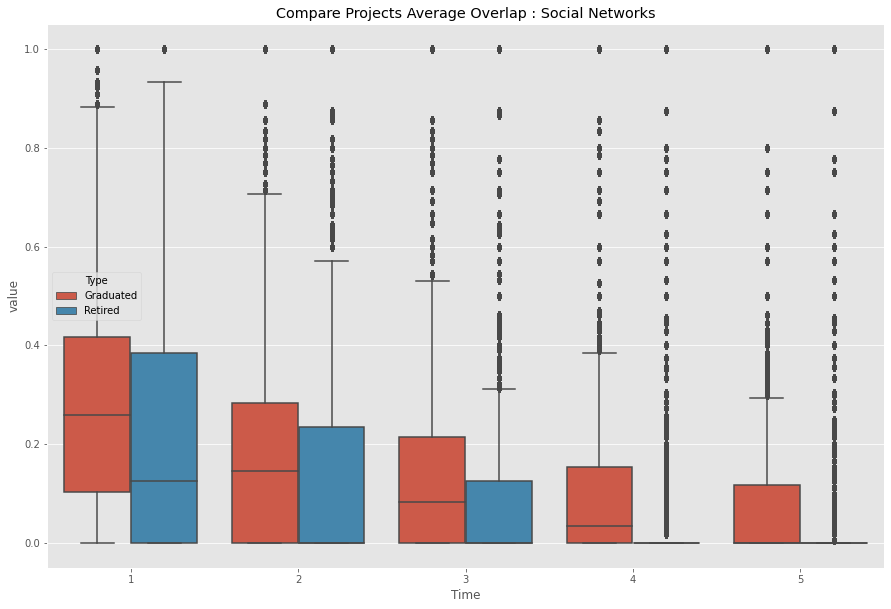

In [ ]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')

plt.title("Compare Projects Average Overlap : tech Networks")

<AxesSubplot:xlabel='Time', ylabel='value'>

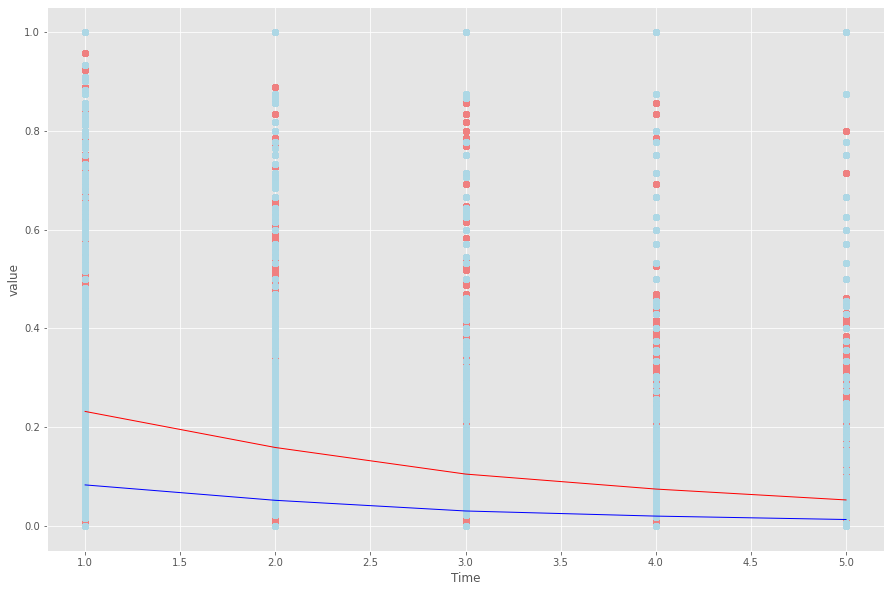

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.regplot(x=dd[dd['Type']=='Graduated']['Time'], y=dd[dd['Type']=='Graduated']['value'], lowess=True, color="lightcoral", 
            line_kws={"color":"red", "linewidth": 1})
sns.regplot(x=dd[dd['Type']=='Retired']['Time'], y=dd[dd['Type']=='Retired']['value'], lowess=True, color="lightblue", 
            line_kws={"color":"blue", "linewidth": 1})